In [23]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
EXPERIMENT_SETUP_FILE = './experiment_setup.csv'
df = pd.read_csv(EXPERIMENT_SETUP_FILE, index_col='number').dropna(axis=1)  # ignore last unused column

In [3]:
df.head()

,fitness_function,use_constraint,constraint_handling_method,constraint,particle_speed_limit,population_size,personal_confidence,swarm_confidence,particle_inertia,constraint_r
number,,,,,,,,,,
0,Shubert function,True,Penalty Method,Constraint 3,13,13,0.8,1.6,0.3,-0.15
1,Booth's function,True,Penalty Method,Constraint 3,13,13,0.8,1.6,0.3,-0.15
2,Schwefel function,True,Penalty Method,Constraint 3,13,13,0.8,1.6,0.3,-0.15
3,Shubert function,True,Penalty Method,Constraint 3,2,13,0.8,1.6,0.3,-0.15
4,Booth's function,True,Penalty Method,Constraint 3,2,13,0.8,1.6,0.3,-0.15


In [4]:
df.describe()

,particle_speed_limit,population_size,personal_confidence,swarm_confidence,particle_inertia,constraint_r
count,180.000000,180.0,180.000000,180.000000,180.000000,1.800000e+02
mean,12.300000,13.0,0.770000,1.250000,0.350000,-1.500000e-01
std,4.184168,0.0,0.237515,0.489727,0.225349,2.783300e-17
min,2.000000,13.0,0.100000,0.100000,0.100000,-1.500000e-01
25%,13.000000,13.0,0.800000,1.000000,0.300000,-1.500000e-01
50%,13.000000,13.0,0.800000,1.600000,0.300000,-1.500000e-01
75%,13.000000,13.0,0.800000,1.600000,0.300000,-1.500000e-01
max,20.000000,13.0,1.000000,1.600000,1.000000,-1.500000e-01


In [5]:
# values in Experiment setup
for column in df.columns:
    print(f'{column}: {df[column].unique()}')

fitness_function: ['Shubert function' "Booth's function" 'Schwefel function']
use_constraint: [ True]
constraint_handling_method: ['Penalty Method' 'Rejection Method']
constraint: ['Constraint 3' 'Constraint 5' 'Constraint 10']
particle_speed_limit: [13  2 10 20]
population_size: [13]
personal_confidence: [0.8 0.1 1. ]
swarm_confidence: [1.6 1.  0.8 0.1]
particle_inertia: [0.3 0.1 1. ]
constraint_r: [-0.15]


# Results

In [8]:
results_df = pd.read_csv("results28-12_14-45-54.csv", na_values="-")

In [9]:
results_df

,number,iteration,fitness_function,use_constraint,constraint_handling_method,constraint,particle_speed_limit,population_size,personal_confidence,swarm_confidence,particle_inertia,constraint_r,fitness,optimum,iterations,optimum_reached,iterations_to_opt
0,10001,1,Shubert function,False,NaN,NaN,13,25,0.5,0.5,0.10,-0.25,1.000000,1.0,500,True,12
1,10002,1,Shubert function,False,NaN,NaN,13,25,0.5,0.5,0.10,-0.50,1.000000,1.0,500,True,12
2,10003,1,Shubert function,False,NaN,NaN,13,25,0.5,0.5,0.10,-0.75,1.000000,1.0,500,True,12
3,10004,1,Shubert function,False,NaN,NaN,13,25,0.5,1.0,0.10,-0.25,1.000000,1.0,500,True,8
4,10005,1,Shubert function,False,NaN,NaN,13,25,0.5,1.0,0.10,-0.50,1.000000,1.0,500,True,8
5,10006,1,Shubert function,False,NaN,NaN,13,25,0.5,1.0,0.10,-0.75,1.000000,1.0,500,True,8
6,10007,1,Shubert function,False,NaN,NaN,13,25,0.5,1.5,0.10,-0.25,1.000000,1.0,500,True,4
7,10008,1,Shubert function,False,NaN,NaN,13,25,0.5,1.5,0.10,-0.50,1.000000,1.0,500,True,4
8,10009,1,Shubert function,False,NaN,NaN,13,25,0.5,1.5,0.10,-0.75,1.000000,1.0,500,True,4
9,10010,1,Shubert function,False,NaN,NaN,13,25,1.0,0.5,0.10,-0.25,1.000000,1.0,500,True,12


In [16]:
xx  = []
yy_loc, yy_opt = [], []
std_loc, std_opt = [], []
for value, data  in results_df.groupby("personal_confidence"):
    data_opt = data[data["optimum_reached"] == True]
    data_loc = data[data["optimum_reached"] == False]
    print(f"{round(len(data_opt) / (len(data_opt) + len(data_loc)) * 100, 2)}% found the optimal value of {len(data_opt) + len(data_loc)} runs.")
    display(value)
    print(f'{data_opt["iterations_to_opt"].mean()} +/- {data_opt["iterations_to_opt"].std()}')
    xx.append(value)
    yy_opt.append(data_opt["iterations_to_opt"].mean())
    yy_loc.append(data_loc["iterations_to_opt"].mean())
    std_opt.append(data_opt["iterations_to_opt"].std())
    std_loc.append(data_loc["iterations_to_opt"].std())
    
   

100.0% found the optimal value of 18 runs.


0.5

7.0 +/- 2.7865221840769436
78.57% found the optimal value of 14 runs.


1.0

9.454545454545455 +/- 1.9679246105293957
100.0% found the optimal value of 9 runs.


1.5

16.0 +/- 6.5383484153110105


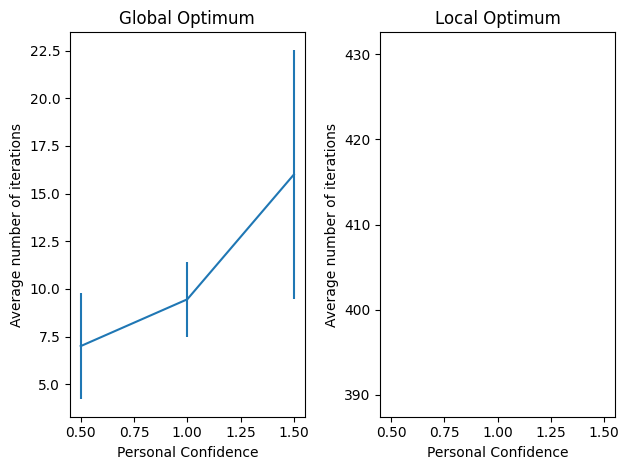

In [21]:
fig, axes = plt.subplots(1,2)

axes[0].errorbar(xx, yy_opt, std_opt)
axes[0].set_title("Global Optimum")
axes[0].set_xlabel("Personal Confidence")
axes[0].set_ylabel("Average number of iterations")

axes[1].errorbar(xx, yy_loc, std_loc)
axes[1].set_title("Local Optimum")
axes[1].set_xlabel("Personal Confidence")
axes[1].set_ylabel("Average number of iterations")

fig.tight_layout()

# Correlations

In [25]:
results_df.drop(columns=["number", "iteration"]).corr()

C:\Users\karst\AppData\Local\Temp\ipykernel_10468\2338905613.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  results_df.drop(columns=["number", "iteration"]).corr()


,use_constraint,constraint_handling_method,constraint,particle_speed_limit,population_size,personal_confidence,swarm_confidence,particle_inertia,constraint_r,fitness,optimum,iterations,optimum_reached,iterations_to_opt
use_constraint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
constraint_handling_method,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
constraint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
particle_speed_limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
personal_confidence,NaN,NaN,NaN,NaN,NaN,1.000000,-0.025438,-0.390199,0.008449,-0.078947,NaN,NaN,-0.078947,0.110753
swarm_confidence,NaN,NaN,NaN,NaN,NaN,-0.025438,1.000000,-0.125730,0.002722,0.322219,NaN,NaN,0.322219,-0.346157
particle_inertia,NaN,NaN,NaN,NaN,NaN,-0.390199,-0.125730,1.000000,0.041758,-0.390199,NaN,NaN,-0.390199,0.372869
constraint_r,NaN,NaN,NaN,NaN,NaN,0.008449,0.002722,0.041758,1.000000,0.008449,NaN,NaN,0.008449,-0.008394
fitness,NaN,NaN,NaN,NaN,NaN,-0.078947,0.322219,-0.390199,0.008449,1.000000,NaN,NaN,1.000000,-0.998878
